Aditya Rameshwar Pachpille
GRIP | Data Science
Task 3: Exploratory Data Analysis-Retail


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

#loading the dataset

In [12]:
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [13]:
import io

In [14]:
df = pd.read_csv(io.StringIO(uploaded['SampleSuperstore.csv'].decode('utf-8')))

In [15]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


CHECKING FOR NULL VALUES:

In [16]:
df.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


SUMMARY OF THE DATASET:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [18]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


TREATMENT OF DUPLICATE DATA VALUES:
CHECKING THE DUPLICATE VALUES:

In [19]:
df.duplicated().sum()

17

DROPPING THE DUPLICATE VALUES:

In [20]:
df.drop_duplicates(inplace=True)

FINDING THE UNIQUE VALUES

In [21]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

DROPPING THE IRREVELANT COLUMNS:

REMOVING THE IRREVELANT COLUMNS:

In [22]:
drop = df.drop(columns='Postal Code', axis=1, inplace =True)

In [23]:
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


THE REASON WHY WE REMOVE THE POSTAL CODE DATA IS, IT'S PRESENCE DOES NOT ADD ANY VALUE TO OUR VISUALIZATION AS WELL AS THE EXPLORATION.

VISUALIZATION OF THE DATA:

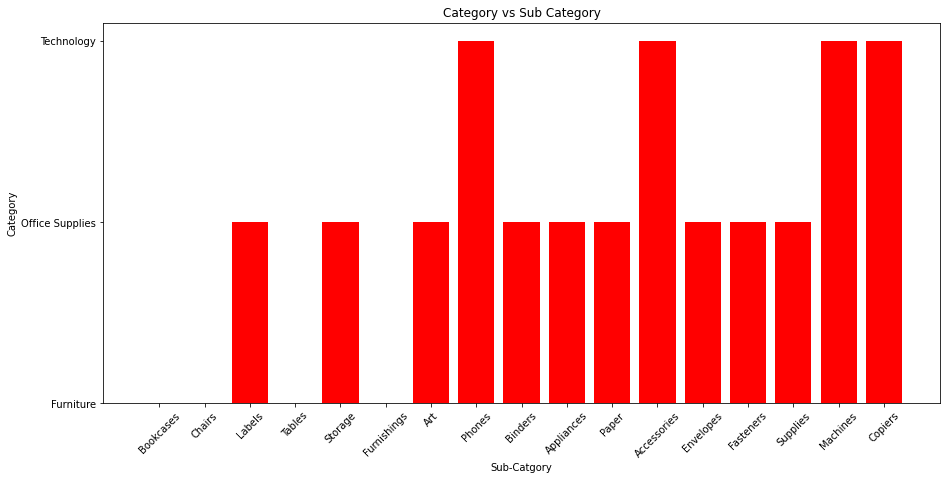

In [24]:
plt.figure(figsize=(15,7))
plt.bar('Sub-Category','Category', data=df, color='red')
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

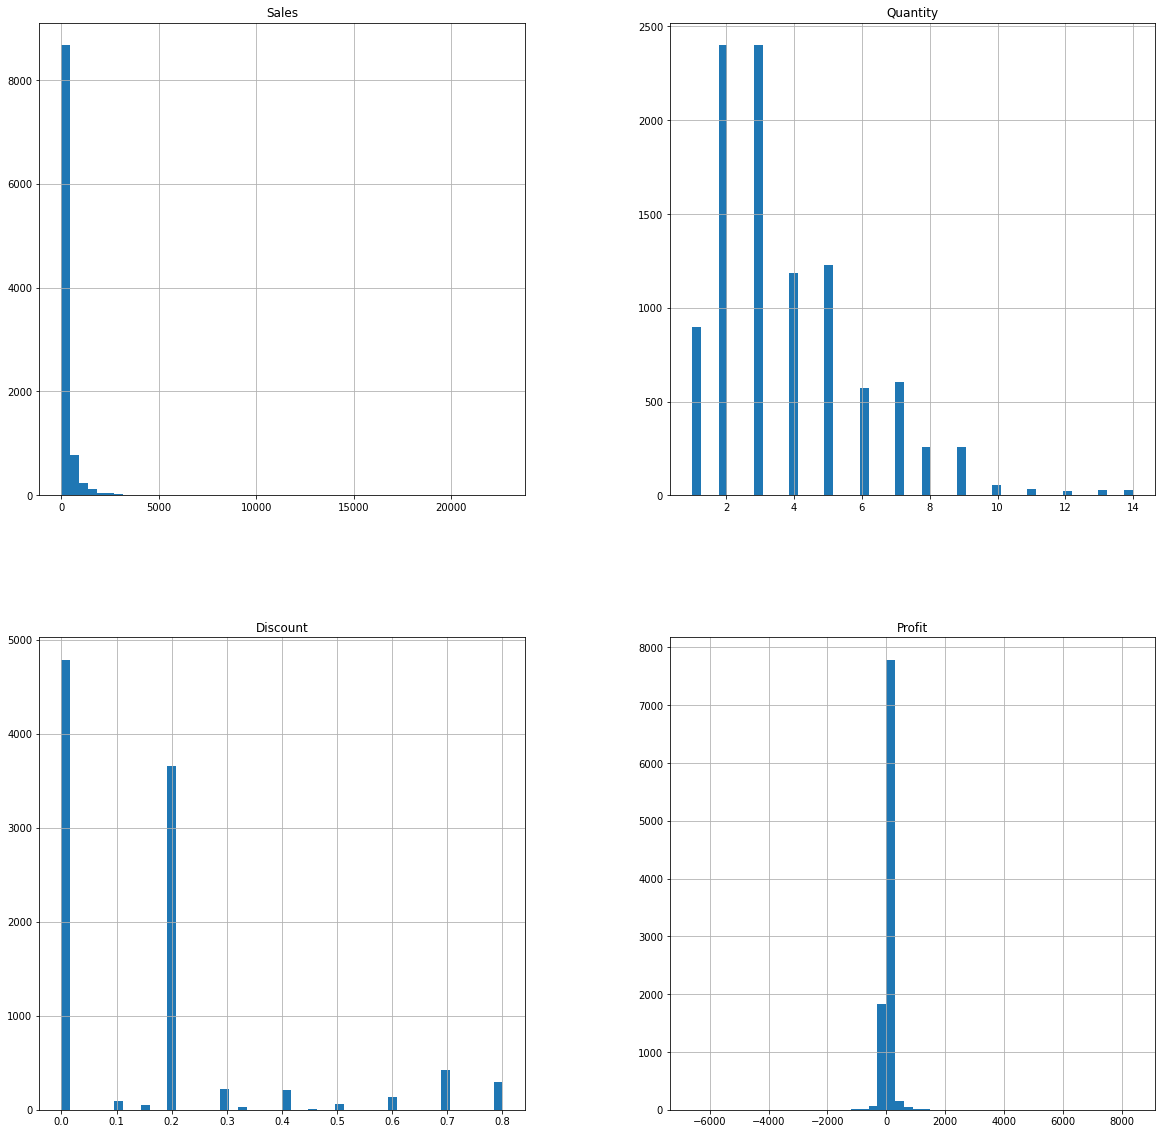

In [25]:
df.hist(bins=50,figsize=(20,20))
plt.show()

In [26]:
s=(df['Segment'].value_counts()/len(df['Segment'])*100)
s

Consumer       51.949484
Corporate      30.219505
Home Office    17.831011
Name: Segment, dtype: float64

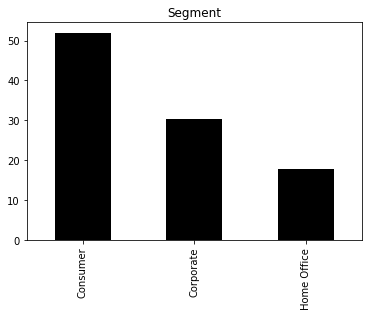

In [27]:
s.plot(kind='bar',color="black",title='Segment')

HERE, WE CAN SEE THAT 50% PEOPLE BELONG TO THE CONSUMER CLASS, 30% OF PEOPLE BELONG TO THE CORPORATE CLASS WHEREAS THE REMAINING 20% OF THE PEOPLE ARE FROM THE HOME OFFICE CLASS.

In [28]:
sh=(df['Ship Mode'].value_counts()/len(df['Ship Mode'])*100)
sh

Standard Class    59.687281
Second Class      19.474792
First Class       15.405432
Same Day           5.432495
Name: Ship Mode, dtype: float64

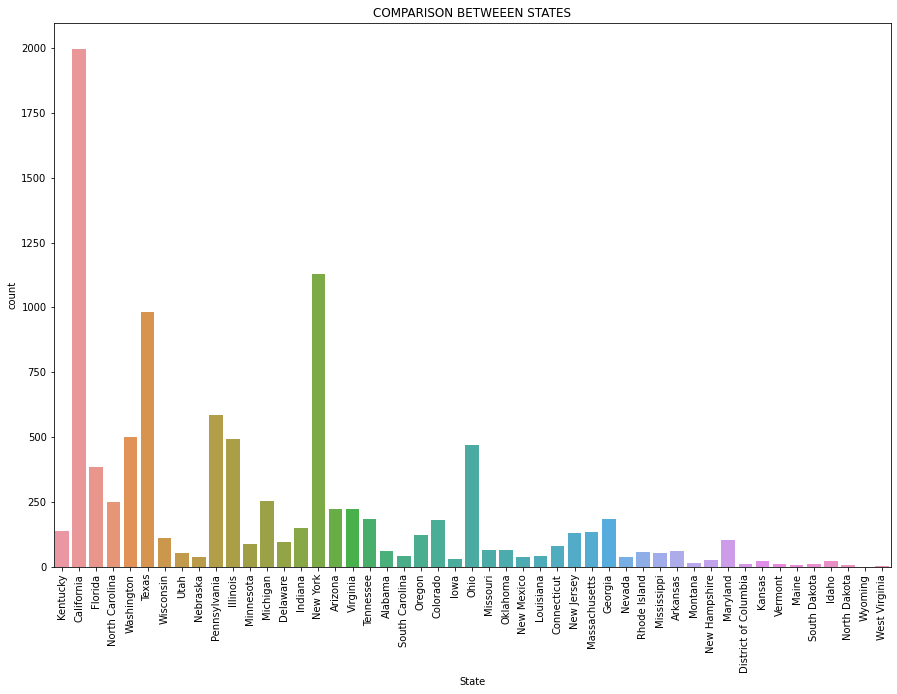

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['State'])
plt.title("COMPARISON BETWEEEN STATES")
plt.xticks(rotation=90)
plt.show()

In [30]:
c=(df['Category'].value_counts()/len(df['Category'])*100)
c

Office Supplies    60.258595
Furniture          21.228826
Technology         18.512579
Name: Category, dtype: float64

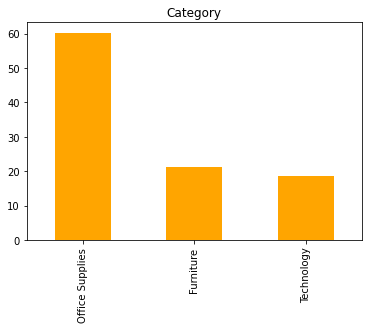

In [31]:
c.plot(kind='bar',color='orange',title='Category')

WE CAN SEE THAT NEARLY 60% BELONGS TO OFFICE SUPPLIES AND APPROXIMATELY 20% BELONGS TO EACH FURNITURE AS WELL AS THE TECHNOLOGY CATEGORY.



<function matplotlib.pyplot.show>

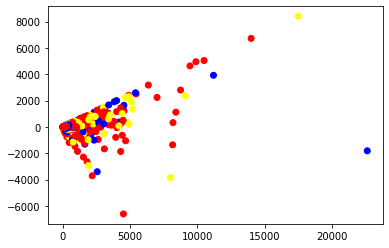

In [32]:
fig, ax=plt.subplots()
colors={'Consumer':'Red','Corporate':'Yellow','Home Office':'Blue'}
ax.scatter(df['Sales'],df['Profit'],c=df['Segment'].apply(lambda x:colors[x]))
plt.show

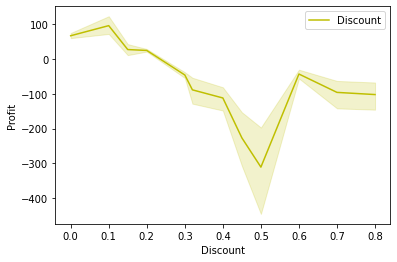

In [36]:
sns.lineplot('Discount','Profit', data=df , color='y',label='Discount')
plt.legend()
plt.show()

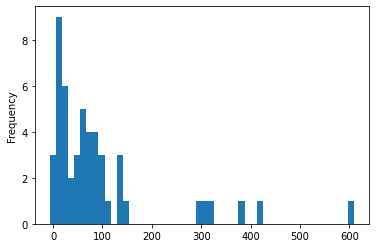

In [37]:
temp_data=df.loc[(df['Segment']=='Consumer')&(df['Discount']==0.1)]
temp_data['Profit'].plot.hist(bins=50)

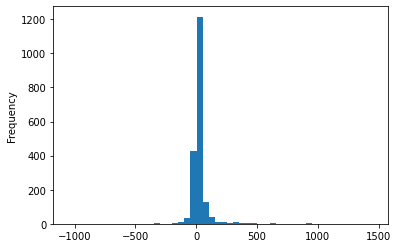

In [38]:
temp_data=df.loc[(df['Segment']=='Consumer')&(df['Discount']==0.2)]
temp_data['Profit'].plot.hist(bins=50)

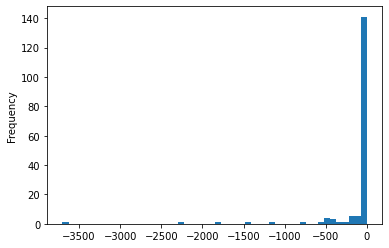

In [39]:
temp_data=df.loc[(df['Segment']=='Consumer')&(df['Discount']==0.8)]
temp_data['Profit'].plot.hist(bins=50)

HERE, WE CAN SAY THAT WHEN THE SUPERSTORE IS OFFERING DISCOUNT LESS THAN 40%, IT IS GETTING PROFIT AS DEPICTED BY THE ABOVE GRAPHS.



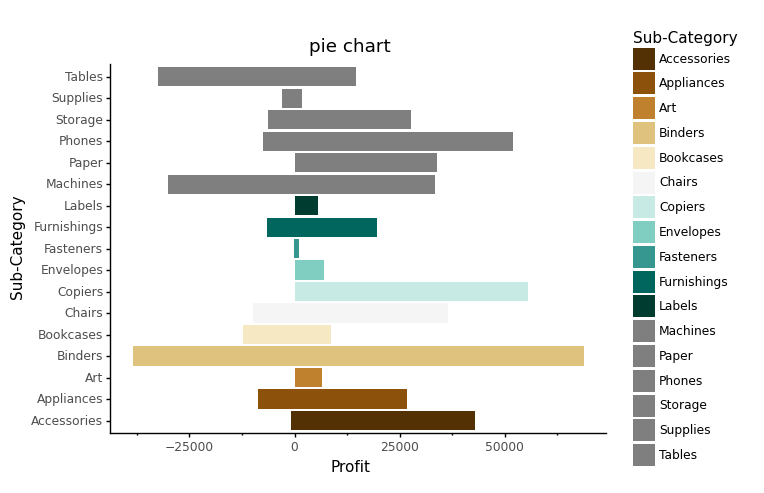

<ggplot: (8751492528477)>

In [40]:
Profit_plot=(ggplot(df, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', pelette='Spectral') + theme_classic() + ggtitle('pie chart'))
display(Profit_plot)



ANALYSIS OF THE SALES:

In [41]:
def state_data_viewer(states):
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig,ax =plt.subplots(1, 3, figsize= (20,4))
        fig.suptitle(state, fontsize=14)
        ax_index =0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x=cat_data.Profit, y= cat_data.index, ax =ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index+=1
        
        fig.show()


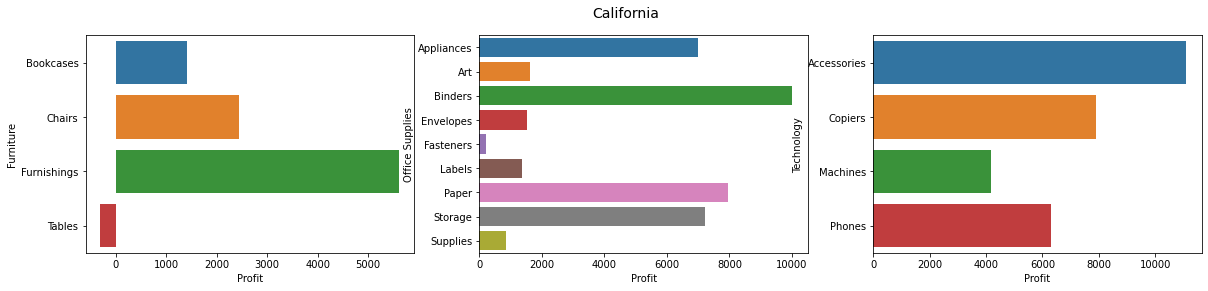

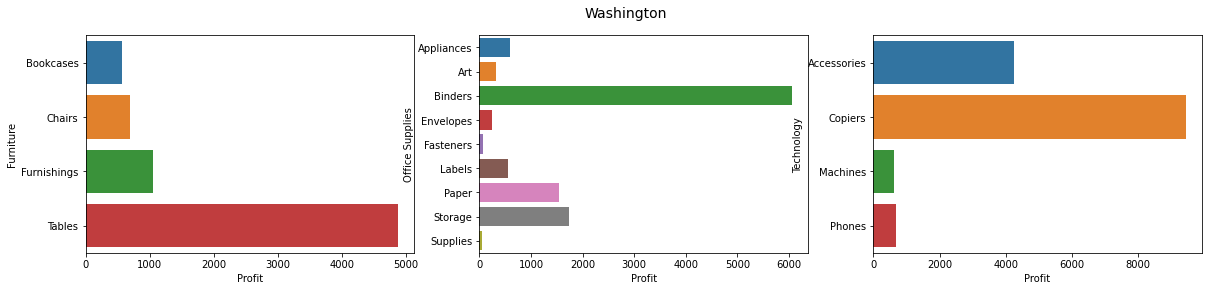

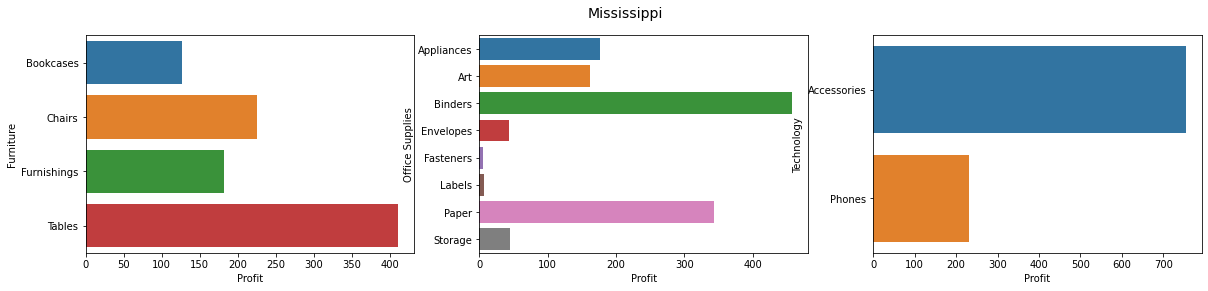

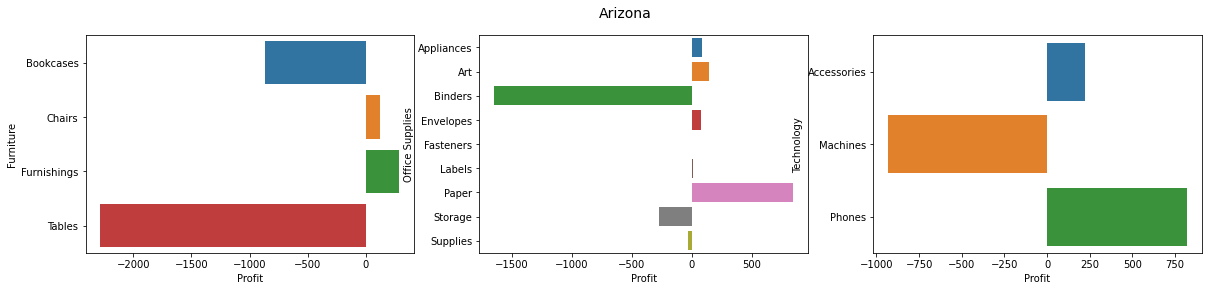

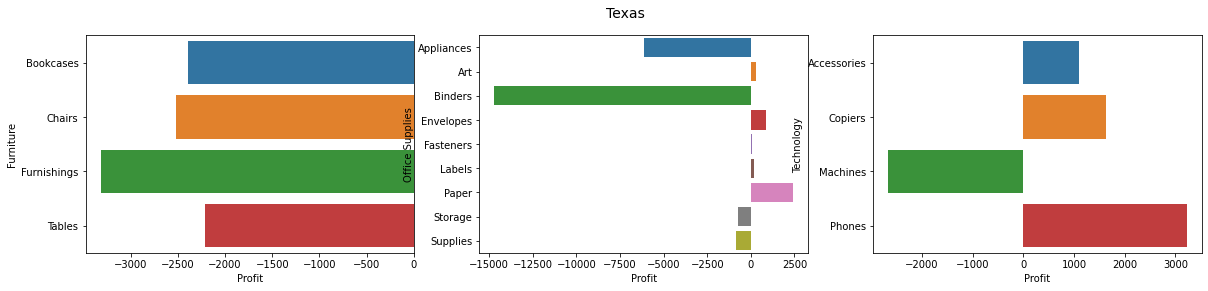

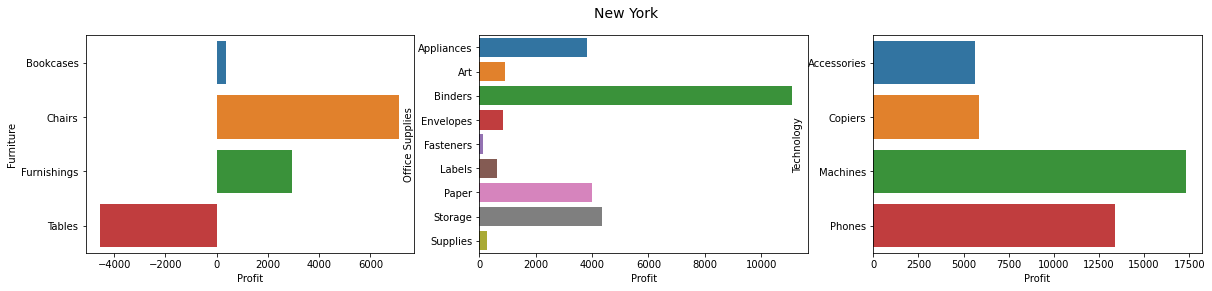

In [42]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas', 'New York']
state_data_viewer(states)

CONCLUSION:
FROM ABOVE DATA WE CAN SEE THE STATES AND CATEGORIES WITH HIGH AND LOW SALE AND PROFIT FROM THE ABOVE DATA VISUALIZATION. NOW, WE CAN WORK ON THE SALES STRATEGY AND VARIOUS OFFERS TO FIND A SOLUTION TO IMPROVE THE PROFIT IN OTHER STATES WHERE SALES ARE LOW.